### Importação dos dados



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
lojas = [loja, loja2, loja3, loja4]

In [3]:
len(loja)

2359

In [4]:
list(loja.columns)

['Produto',
 'Categoria do Produto',
 'Preço',
 'Frete',
 'Data da Compra',
 'Vendedor',
 'Local da compra',
 'Avaliação da compra',
 'Tipo de pagamento',
 'Quantidade de parcelas',
 'lat',
 'lon']

In [5]:
faturamentos = []
nomes_lojas = []

i = 1
for df in lojas:
    total = df['Preço'].sum()
    faturamentos.append(total)
    nomes_lojas.append("Loja " + str(i))
    i += 1

faturamentos[:4]


[1534509.12, 1488459.06, 1464025.03, 1384497.58]

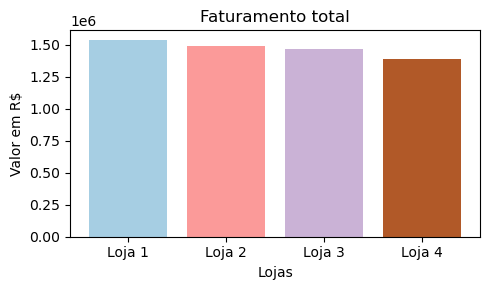

In [6]:
cor = mpl.colormaps['Paired'](np.linspace(0, 1, 4))

plt.figure(figsize=(5, 3))
plt.bar(nomes_lojas, faturamentos, color=cor)
plt.title("Faturamento total")
plt.xlabel("Lojas")
plt.ylabel("Valor em R$")
plt.tight_layout()

plt.show()

<p style="font-size:20px;"> É possível notar que a Loja 4 tem um faturamente total razoavelmente mais baixo que as outras lojas</p>

# 2. Vendas por Categoria


In [7]:
lojas_juntas = pd.concat(lojas)

vendas_categoria = lojas_juntas.groupby("Categoria do Produto")["Preço"].sum()

vendas_categoria.head(3)

Categoria do Produto
brinquedos            98140.86
eletrodomesticos    1766337.03
eletronicos         2214099.72
Name: Preço, dtype: float64

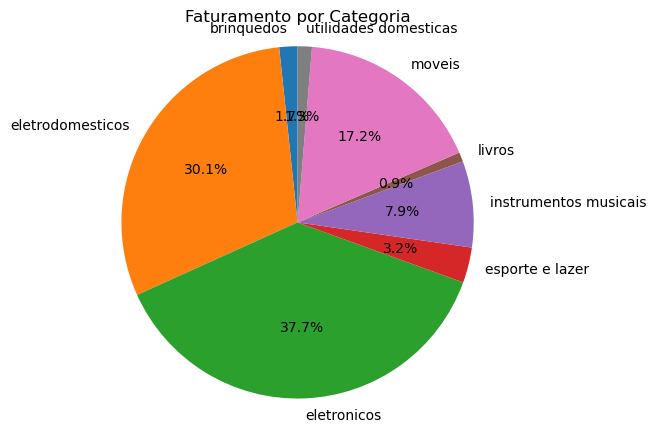

In [8]:
categorias = list(vendas_categoria.index)
valores = list(vendas_categoria.values)

plt.figure(figsize=(5, 5))
plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=90)
plt.title('Faturamento por Categoria')
plt.axis('equal')
plt.show()


<p style="font-size:20px;"><strong> Verificando possíveis diferenciais em lojas distintas <strong><p>

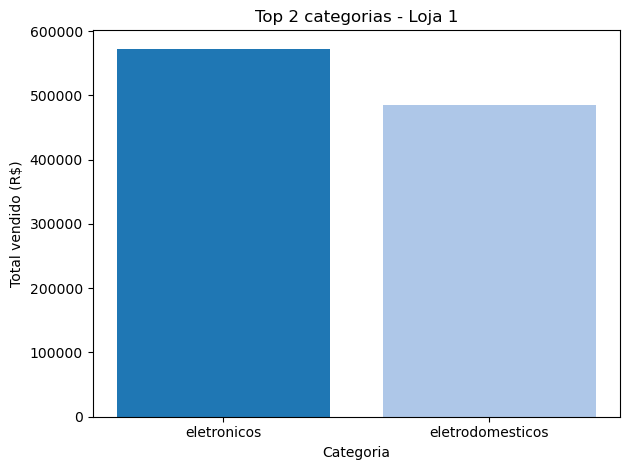

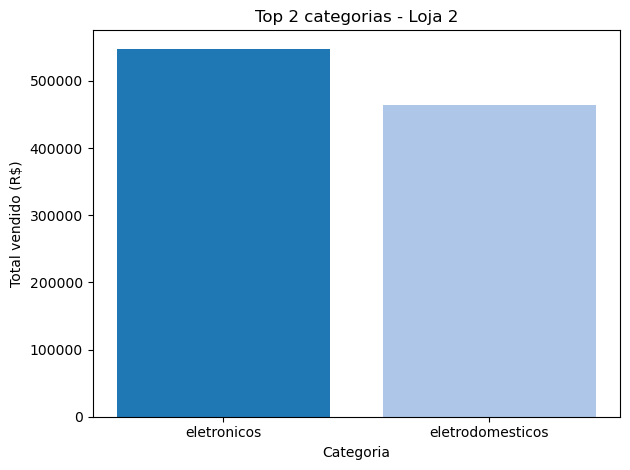

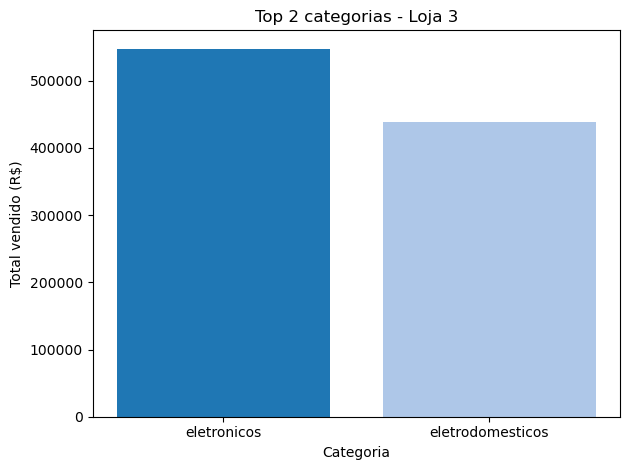

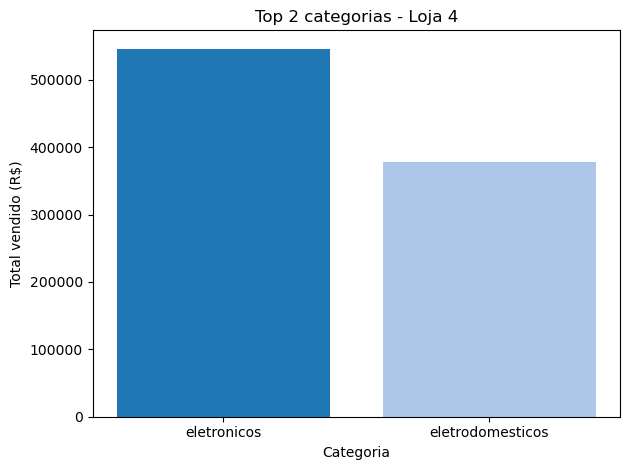

In [9]:
i = 1
for df in lojas:
    
    vendas_categoria = df.groupby('Categoria do Produto')['Preço'].sum()
    
    # Ordena e pega o top 2
    top2 = vendas_categoria.sort_values(ascending=False).head(2)
    
    # Plota
    plt.figure()
    plt.bar(top2.index, top2.values, color=['#1f77b4', '#aec7e8'])
    plt.title(f'Top 2 categorias - Loja {i}')
    plt.ylabel('Total vendido (R$)')
    plt.xlabel('Categoria')
    plt.tight_layout()
    plt.show()
    
    i += 1

<p style="font-size:20px;">É possível observar que todas as lojas têm como principal nicho os segmentos de eletrônicos e eletrodomésticos. No entanto, a Loja 4, além de apresentar o menor volume de vendas, também não se destaca em nenhuma categoria específica, o que sugere ausência de um diferencial competitivo claro em seu portfólio de produtos.</p>


# 3. Média de Avaliação das Lojas

In [10]:
loja['Avaliação da compra'].value_counts()

Avaliação da compra
5    1292
4     444
1     319
3     218
2      86
Name: count, dtype: int64

In [11]:
avaliacoes = []
nomes_lojas = []

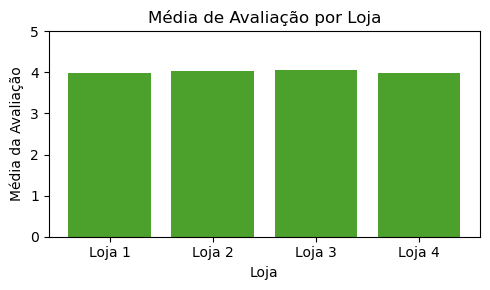

In [12]:
i = 1
for df in lojas:
    
    media_avaliacao = df['Avaliação da compra'].mean()  
    avaliacoes.append(media_avaliacao)
    nomes_lojas.append(f'Loja {i}')
    
    i += 1


plt.figure(figsize=(5, 3))
plt.bar(nomes_lojas, avaliacoes, color='#4ca02c')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Média da Avaliação')
plt.xlabel('Loja')
plt.ylim(0, 5)  
plt.tight_layout()
plt.show()


In [13]:
for nome, media in zip(nomes_lojas, avaliacoes):
    print(f'{nome}: média de avaliações = {media:.2f}')


Loja 1: média de avaliações = 3.98
Loja 2: média de avaliações = 4.04
Loja 3: média de avaliações = 4.05
Loja 4: média de avaliações = 4.00


# 4. Produtos Mais e Menos Vendidos

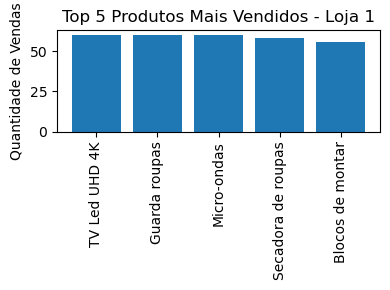

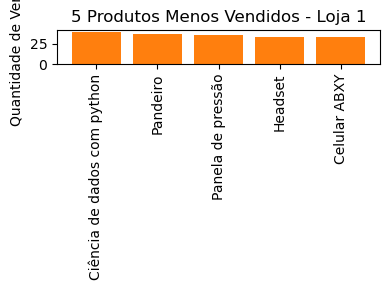

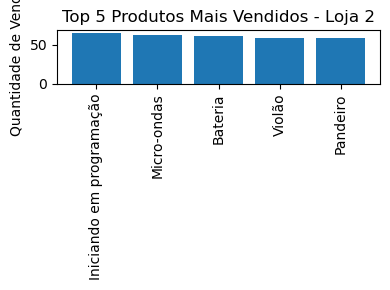

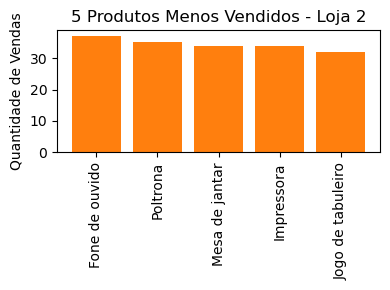

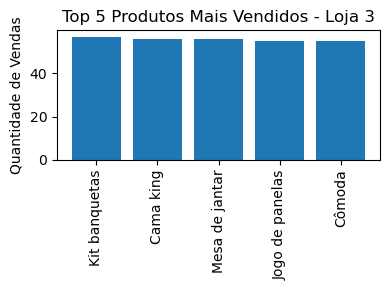

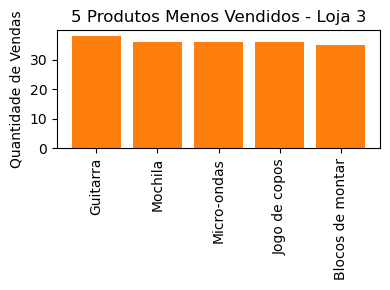

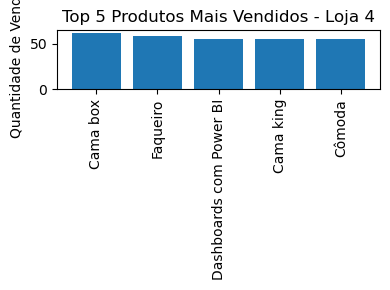

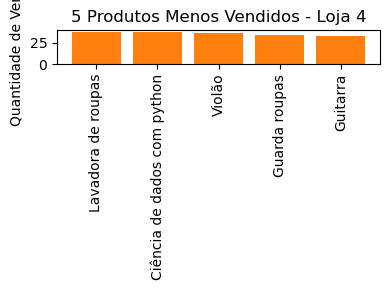

In [14]:
i = 1
for df in lojas:
    
    produtos_mais_vendidos = df['Produto'].value_counts().head(5)
    produtos_menos_vendidos = df['Produto'].value_counts().tail(5)
    
    plt.figure(figsize=(4, 3))
    plt.bar(produtos_mais_vendidos.index, produtos_mais_vendidos.values, color='#1f77b4')
    plt.title(f'Top 5 Produtos Mais Vendidos - Loja {i}')
    plt.ylabel('Quantidade de Vendas')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(4, 3))
    plt.bar(produtos_menos_vendidos.index, produtos_menos_vendidos.values, color='#ff7f0e')
    plt.title(f'5 Produtos Menos Vendidos - Loja {i}')
    plt.ylabel('Quantidade de Vendas')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    i += 1


<p style="font-size:20px;">
&nbsp;&nbsp;&nbsp;&nbsp;A análise reflete um padrão condizente à análise de categorias mais vendidas para as lojas 1 e 2, sugerindo um portfólio com forte dependência de poucos itens, majoritariamente nas categorias de Eletrônicos e Eletrodomésticos. Já as lojas 3 e 4 têm como seus campeões de vendas produtos da categoria Móveis, o que indica uma diferenciação no perfil de atuação.</P>

<p style="font-size:20px;">
    &nbsp;&nbsp;&nbsp;&nbsp;Essa segmentação pode refletir estratégias de mercado distintas, como foco em bens duráveis para o lar nas lojas 3 e 4, e itens de maior rotatividade e valor agregado nas lojas 1 e 2. No entanto, é importante observar que, embora a Loja 4 compartilhe esse foco com a Loja 3, seu desempenho geral é inferior, o que pode indicar ineficiência operacional, mix de produtos menos atrativo, ou experiência de compra insatisfatória, como já sugerido pela análise de avaliações e frete médio.
</p>


# 5. Frete Médio por Loja


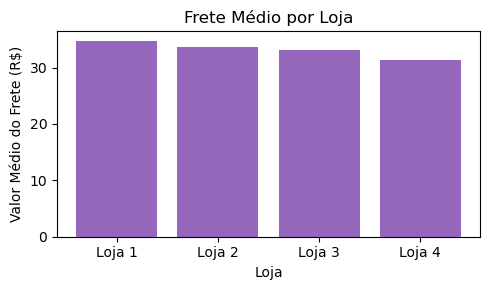

In [15]:
fretes_medios = []
nomes_lojas = []

i = 1
for df in lojas:
    frete_medio = df['Frete'].mean()
    fretes_medios.append(frete_medio)
    nomes_lojas.append(f'Loja {i}')
    i += 1

# Gráfico
plt.figure(figsize=(5, 3))
plt.bar(nomes_lojas, fretes_medios, color='#9467bd')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Loja')
plt.tight_layout()
plt.show()




In [16]:
for nome, frete in zip(nomes_lojas, fretes_medios):
    print(f'{nome}: frete médio = R$ {frete:.2f}')

Loja 1: frete médio = R$ 34.69
Loja 2: frete médio = R$ 33.62
Loja 3: frete médio = R$ 33.07
Loja 4: frete médio = R$ 31.28


<p style="font-size:20px; text-indent: 2em;">
A análise do valor médio de frete revela um padrão relevante: há uma redução gradual do frete médio da Loja 1 até a Loja 4. A Loja 1 apresenta o frete médio mais elevado entre todas, enquanto a Loja 4, embora não apresente grande destaque em faturamento ou avaliação, possui o menor frete médio entre as quatro lojas.
</p>

<p style="font-size:20px; text-indent: 2em;">
Esse comportamento pode refletir uma possível estratégia comercial da Loja 4 para compensar sua baixa performance em outros indicadores, tentando atrair consumidores por meio de frete mais acessível. No entanto, a diferença entre os valores médios de frete entre as lojas 2, 3 e 4 é sutil, sugerindo que apenas a Loja 1 se destaca negativamente neste quesito.
</p>

<p style="font-size:20px; text-indent: 2em;">
A consistência entre avaliações medianas e custos logísticos elevados na Loja 1 pode estar impactando sua competitividade, especialmente em um cenário onde consumidores valorizam cada vez mais a entrega rápida e acessível.
</p>


# Resumo

<p style="font-size:20px; text-indent: 2em;">
Com base nos principais indicadores analisados, observa-se que a <strong>Loja 4 apresenta o desempenho mais crítico</strong> em praticamente todos os aspectos avaliados. Seu faturamento total é visivelmente inferior ao das demais lojas, refletindo uma baixa movimentação de vendas e possível subaproveitamento de estoque e estrutura.
</p>

<p style="font-size:20px; text-indent: 2em;">
Ao examinar as categorias de produtos mais vendidas por loja, nota-se que as Lojas 1 e 2 concentram-se fortemente nos segmentos de eletrônicos e eletrodomésticos, indicando foco e especialização em nichos com alta demanda. Já a Loja 4, embora tenha como destaque a categoria "Móveis", não apresenta volume de vendas suficiente para competir em rentabilidade com as demais — evidência de que seu portfólio não possui apelo competitivo forte.
</p>

<p style="font-size:20px; text-indent: 2em;">
Em relação à <strong>avaliação dos clientes</strong>, a Loja 4 não se destaca positivamente. Sua média é próxima à das outras lojas, mas isso não compensa suas deficiências em faturamento e foco estratégico. Isso sugere que sua performance mediana em experiência do consumidor não é suficiente para alavancar seu desempenho geral.
</p>

<p style="font-size:20px; text-indent: 2em;">
No quesito <strong>frete médio</strong>, a Loja 4 é a que apresenta o valor mais baixo, ainda que de forma sutil. No entanto, essa vantagem não se traduz em vantagem competitiva real, já que o menor custo logístico não gera aumento perceptível nas vendas nem em avaliações, o que indica uma ineficiência estrutural no modelo da loja.
</p>

<p style="font-size:20px; text-indent: 2em;">
Portanto, <strong>a recomendação mais racional é a descontinuação da Loja 4</strong>. Sua permanência no portfólio representa custos operacionais que não se convertem em retorno proporcional. Além disso, seu desempenho fraco em todos os pilares — faturamento, diferencial competitivo, avaliação e conversão de logística em venda — reforça a baixa viabilidade de recuperação sem mudanças significativas.
</p>
